Output directory: assignment_results
Loaded color image: (360, 540, 3)
EC7212 - COMPUTER VISION ASSIGNMENT PROCESSOR
Processing mode: COLOR
Exported: assignment_results\original_input.png

TASK 1: INTENSITY LEVEL QUANTIZATION
Exported: assignment_results\task1_quantized_2levels.png
✓ Quantization to 2 levels completed
Exported: assignment_results\task1_quantized_4levels.png
✓ Quantization to 4 levels completed
Exported: assignment_results\task1_quantized_8levels.png
✓ Quantization to 8 levels completed
Exported: assignment_results\task1_quantized_16levels.png
✓ Quantization to 16 levels completed
Exported: assignment_results\task1_quantized_32levels.png
✓ Quantization to 32 levels completed
Exported: assignment_results\task1_quantized_64levels.png
✓ Quantization to 64 levels completed
Exported: assignment_results\task1_quantized_128levels.png
✓ Quantization to 128 levels completed


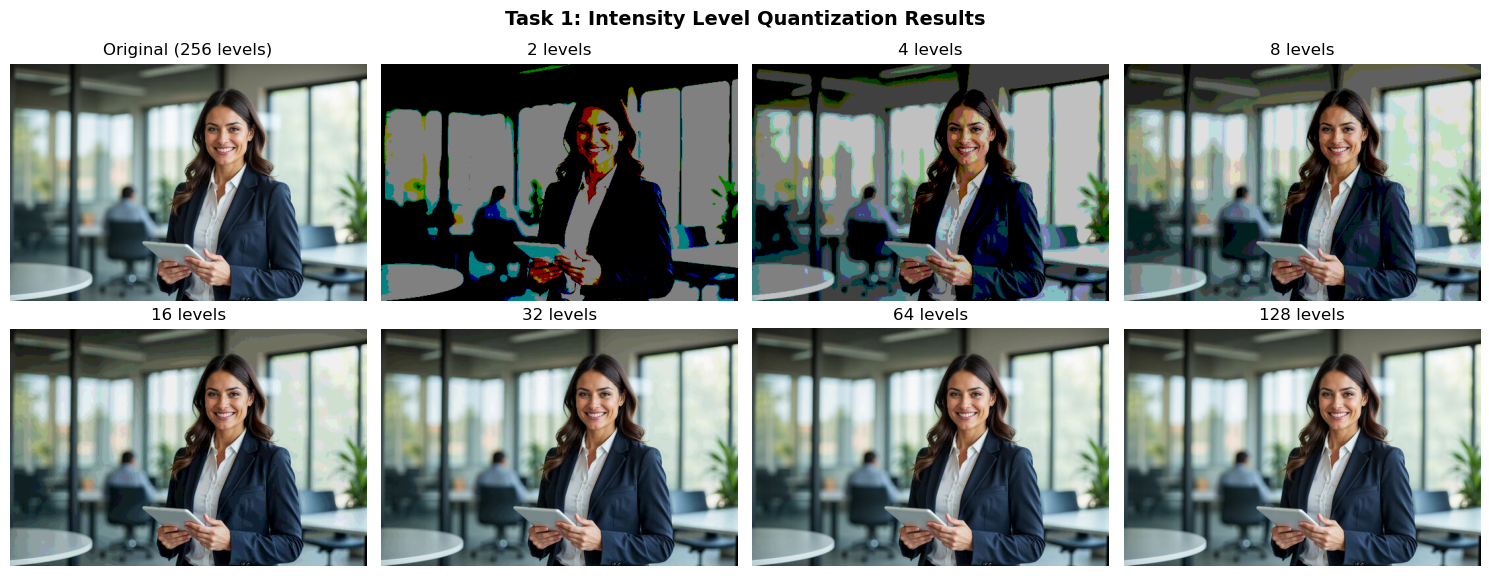


TASK 2: NEIGHBORHOOD AVERAGING FILTERS
Exported: assignment_results\task2_averaging_3x3.png
✓ 3×3 averaging filter applied
Exported: assignment_results\task2_averaging_10x10.png
✓ 10×10 averaging filter applied
Exported: assignment_results\task2_averaging_20x20.png
✓ 20×20 averaging filter applied


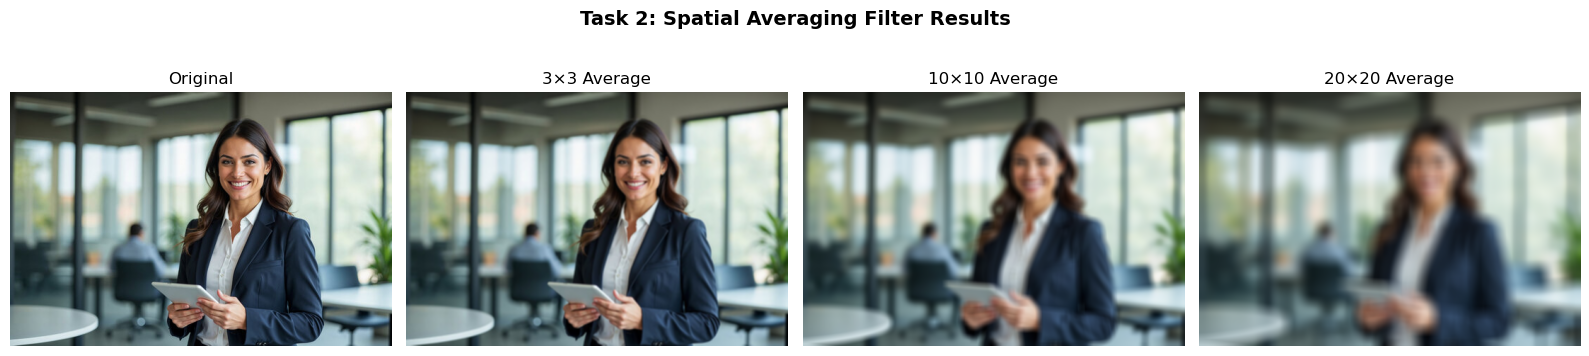


TASK 3: IMAGE GEOMETRIC TRANSFORMATION
Exported: assignment_results\task3_rotation_45deg.png
✓ 45° rotation completed
Exported: assignment_results\task3_rotation_90deg.png
✓ 90° rotation completed


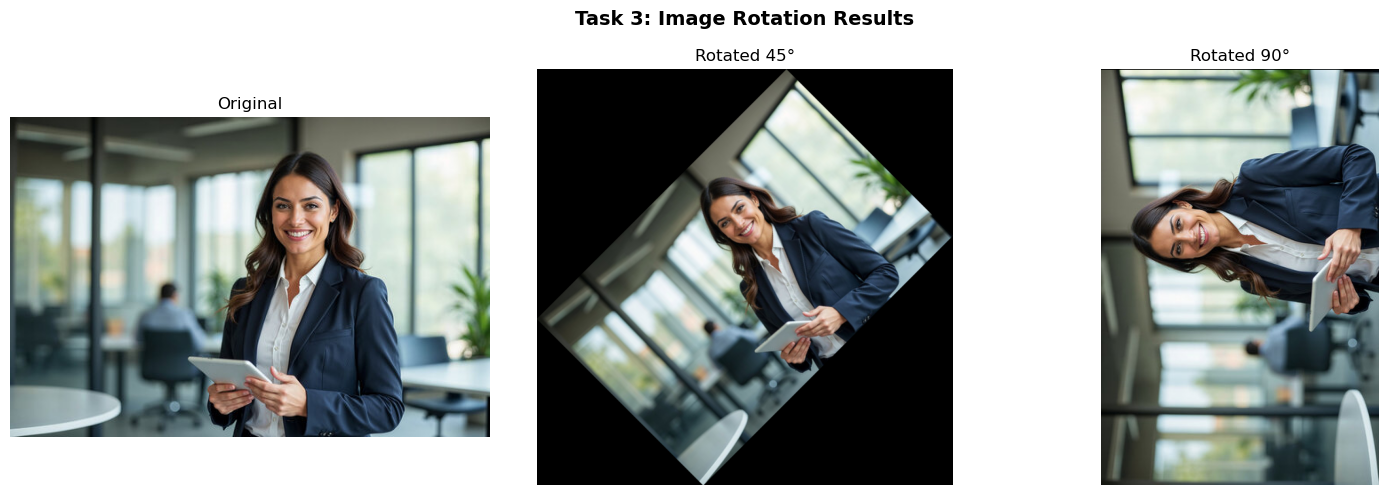


TASK 4: SPATIAL RESOLUTION REDUCTION
Exported: assignment_results\task4_resolution_3x3blocks.png
✓ 3×3 block averaging completed
Exported: assignment_results\task4_resolution_5x5blocks.png
✓ 5×5 block averaging completed
Exported: assignment_results\task4_resolution_7x7blocks.png
✓ 7×7 block averaging completed


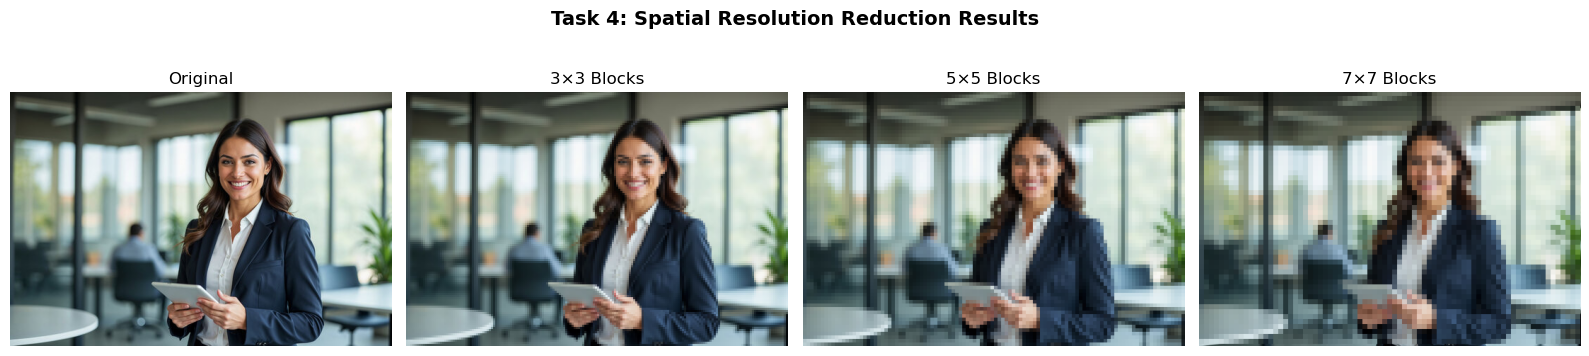


ASSIGNMENT PROCESSING COMPLETED!
All results saved in: assignment_results


In [6]:
#!/usr/bin/env python3
"""
EC7212 - Computer Vision and Image Processing
Take Home Assignment 1

Student: Virajani M.Y
Reg No: EG/2020/4254

This program implements four image processing operations:
1. Intensity level quantization 
2. Neighborhood averaging filters
3. Image geometric transformations
4. Block-based resolution reduction
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import math

class CVAssignmentProcessor:
    """
    Main class for handling computer vision assignment tasks
    """
    
    def __init__(self, input_path, color_mode=True):
        """
        Initialize the image processor
        
        Args:
            input_path (str): Path to input image
            color_mode (bool): True for RGB, False for grayscale
        """
        self.input_path = input_path
        self.color_mode = color_mode
        self.source_img = None
        self.output_dir = Path("assignment_results")
        self._setup_environment()
        self._load_source_image()
    
    def _setup_environment(self):
        """Create output directory if it doesn't exist"""
        self.output_dir.mkdir(exist_ok=True)
        print(f"Output directory: {self.output_dir}")
    
    def _load_source_image(self):
        """Load and prepare the source image"""
        if self.color_mode:
            # Load in color and convert BGR to RGB
            img_bgr = cv2.imread(str(self.input_path))
            if img_bgr is None:
                raise FileNotFoundError(f"Cannot load image: {self.input_path}")
            self.source_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            print(f"Loaded color image: {self.source_img.shape}")
        else:
            # Load in grayscale
            self.source_img = cv2.imread(str(self.input_path), cv2.IMREAD_GRAYSCALE)
            if self.source_img is None:
                raise FileNotFoundError(f"Cannot load image: {self.input_path}")
            print(f"Loaded grayscale image: {self.source_img.shape}")
    
    def _export_result(self, processed_img, filename):
        """
        Save processed image to output directory
        
        Args:
            processed_img: Processed image array
            filename (str): Output filename
        """
        output_path = self.output_dir / filename
        
        if len(processed_img.shape) == 3:
            # Convert RGB back to BGR for OpenCV saving
            img_to_save = cv2.cvtColor(processed_img, cv2.COLOR_RGB2BGR)
        else:
            img_to_save = processed_img
            
        cv2.imwrite(str(output_path), img_to_save)
        print(f"Exported: {output_path}")

# =============================================================================
# ASSIGNMENT TASK 1: INTENSITY LEVEL QUANTIZATION
# =============================================================================

    def quantize_intensity_levels(self, target_levels):
        """
        Reduce intensity levels to specified power of 2
        
        Args:
            target_levels (int): Target number of intensity levels (must be power of 2)
            
        Returns:
            numpy.ndarray: Quantized image
        """
        # Validate input is power of 2
        if target_levels <= 0 or not self._is_power_of_two(target_levels):
            raise ValueError(f"Target levels must be positive power of 2, got: {target_levels}")
        
        # Calculate step size for quantization
        step_size = 256 // target_levels
        
        if self.color_mode and len(self.source_img.shape) == 3:
            # Process each color channel independently
            quantized = np.zeros_like(self.source_img)
            for ch in range(3):
                channel_data = self.source_img[:, :, ch]
                quantized[:, :, ch] = (channel_data // step_size) * step_size
        else:
            # Process grayscale image
            quantized = (self.source_img // step_size) * step_size
        
        return np.clip(quantized, 0, 255).astype(np.uint8)
    
    def _is_power_of_two(self, n):
        """Check if number is power of 2"""
        return n > 0 and (n & (n - 1)) == 0
    
    def execute_task1_quantization(self):
        """Execute Task 1: Intensity level reduction"""
        print("\n" + "="*50)
        print("TASK 1: INTENSITY LEVEL QUANTIZATION")
        print("="*50)
        
        # Test different quantization levels (powers of 2)
        quantization_levels = [2, 4, 8, 16, 32, 64, 128]
        
        # Setup visualization
        num_plots = len(quantization_levels) + 1
        cols = 4
        rows = math.ceil(num_plots / cols)
        
        fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
        if rows == 1:
            axes = axes.reshape(1, -1)
        axes = axes.flatten()
        
        # Display original
        self._display_image(axes[0], self.source_img, "Original (256 levels)")
        
        # Process each quantization level
        for idx, levels in enumerate(quantization_levels):
            quantized_img = self.quantize_intensity_levels(levels)
            
            # Display result
            plot_idx = idx + 1
            self._display_image(axes[plot_idx], quantized_img, f"{levels} levels")
            
            # Save result
            filename = f"task1_quantized_{levels}levels.png"
            self._export_result(quantized_img, filename)
            
            print(f"✓ Quantization to {levels} levels completed")
        
        # Hide unused subplots
        for idx in range(num_plots, len(axes)):
            axes[idx].axis('off')
        
        plt.suptitle("Task 1: Intensity Level Quantization Results", fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

# =============================================================================
# ASSIGNMENT TASK 2: SPATIAL AVERAGING FILTERS  
# =============================================================================

    def apply_neighborhood_averaging(self, kernel_dimension):
        """
        Apply spatial averaging filter with specified kernel size
        
        Args:
            kernel_dimension (int): Size of averaging kernel (e.g., 3 for 3x3)
            
        Returns:
            numpy.ndarray: Filtered image
        """
        # Create averaging kernel
        avg_kernel = np.ones((kernel_dimension, kernel_dimension), dtype=np.float32)
        avg_kernel /= (kernel_dimension * kernel_dimension)
        
        if self.color_mode and len(self.source_img.shape) == 3:
            # Apply filter to each channel
            filtered_img = np.zeros_like(self.source_img, dtype=np.float32)
            for ch in range(3):
                filtered_img[:, :, ch] = cv2.filter2D(
                    self.source_img[:, :, ch].astype(np.float32), -1, avg_kernel
                )
        else:
            # Apply filter to grayscale image
            filtered_img = cv2.filter2D(
                self.source_img.astype(np.float32), -1, avg_kernel
            )
        
        return np.clip(filtered_img, 0, 255).astype(np.uint8)
    
    def execute_task2_filtering(self):
        """Execute Task 2: Spatial averaging with different neighborhood sizes"""
        print("\n" + "="*50)
        print("TASK 2: NEIGHBORHOOD AVERAGING FILTERS")
        print("="*50)
        
        # Different neighborhood sizes as specified
        filter_sizes = [3, 10, 20]
        
        # Setup visualization
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        
        # Show original
        self._display_image(axes[0], self.source_img, "Original")
        
        # Apply different filter sizes
        for idx, filter_size in enumerate(filter_sizes):
            filtered_result = self.apply_neighborhood_averaging(filter_size)
            
            # Display result
            plot_idx = idx + 1
            title = f"{filter_size}×{filter_size} Average"
            self._display_image(axes[plot_idx], filtered_result, title)
            
            # Save result
            filename = f"task2_averaging_{filter_size}x{filter_size}.png"
            self._export_result(filtered_result, filename)
            
            print(f"✓ {filter_size}×{filter_size} averaging filter applied")
        
        plt.suptitle("Task 2: Spatial Averaging Filter Results", fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

# =============================================================================
# ASSIGNMENT TASK 3: IMAGE ROTATION
# =============================================================================

    def perform_rotation(self, rotation_angle):
        """
        Rotate image by specified angle
        
        Args:
            rotation_angle (float): Rotation angle in degrees
            
        Returns:
            numpy.ndarray: Rotated image
        """
        if len(self.source_img.shape) == 3:
            img_height, img_width = self.source_img.shape[:2]
        else:
            img_height, img_width = self.source_img.shape
        
        # Calculate rotation center
        rotation_center = (img_width // 2, img_height // 2)
        
        # Get transformation matrix
        transform_matrix = cv2.getRotationMatrix2D(rotation_center, rotation_angle, 1.0)
        
        # Calculate new dimensions to avoid cropping
        cos_val = abs(transform_matrix[0, 0])
        sin_val = abs(transform_matrix[0, 1])
        
        new_width = int((img_height * sin_val) + (img_width * cos_val))
        new_height = int((img_height * cos_val) + (img_width * sin_val))
        
        # Adjust transformation matrix for new center
        transform_matrix[0, 2] += (new_width / 2) - rotation_center[0]
        transform_matrix[1, 2] += (new_height / 2) - rotation_center[1]
        
        # Apply rotation
        rotated_result = cv2.warpAffine(
            self.source_img, transform_matrix, (new_width, new_height)
        )
        
        return rotated_result
    
    def execute_task3_rotation(self):
        """Execute Task 3: Image rotation by 45 and 90 degrees"""
        print("\n" + "="*50)
        print("TASK 3: IMAGE GEOMETRIC TRANSFORMATION")
        print("="*50)
        
        # Rotation angles as specified
        rotation_angles = [45, 90]
        
        # Setup visualization
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Show original
        self._display_image(axes[0], self.source_img, "Original")
        
        # Apply rotations
        for idx, angle in enumerate(rotation_angles):
            rotated_img = self.perform_rotation(angle)
            
            # Display result
            plot_idx = idx + 1
            title = f"Rotated {angle}°"
            self._display_image(axes[plot_idx], rotated_img, title)
            
            # Save result
            filename = f"task3_rotation_{angle}deg.png"
            self._export_result(rotated_img, filename)
            
            print(f"✓ {angle}° rotation completed")
        
        plt.suptitle("Task 3: Image Rotation Results", fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

# =============================================================================
# ASSIGNMENT TASK 4: BLOCK-BASED RESOLUTION REDUCTION
# =============================================================================

    def reduce_spatial_resolution(self, block_dimension):
        """
        Reduce spatial resolution using block averaging
        
        Args:
            block_dimension (int): Size of non-overlapping blocks
            
        Returns:
            numpy.ndarray: Resolution-reduced image
        """
        if self.color_mode and len(self.source_img.shape) == 3:
            img_height, img_width, channels = self.source_img.shape
            processed_img = self.source_img.astype(np.float64)
            
            # Process non-overlapping blocks for each channel
            for row in range(0, img_height - block_dimension + 1, block_dimension):
                for col in range(0, img_width - block_dimension + 1, block_dimension):
                    # Extract current block
                    current_block = self.source_img[
                        row:row+block_dimension, 
                        col:col+block_dimension, 
                        :
                    ]
                    
                    # Calculate and apply average for each channel
                    for ch in range(channels):
                        channel_mean = np.mean(current_block[:, :, ch])
                        processed_img[
                            row:row+block_dimension, 
                            col:col+block_dimension, 
                            ch
                        ] = channel_mean
        else:
            img_height, img_width = self.source_img.shape
            processed_img = self.source_img.astype(np.float64)
            
            # Process non-overlapping blocks
            for row in range(0, img_height - block_dimension + 1, block_dimension):
                for col in range(0, img_width - block_dimension + 1, block_dimension):
                    # Extract current block
                    current_block = self.source_img[
                        row:row+block_dimension, 
                        col:col+block_dimension
                    ]
                    
                    # Calculate and apply average
                    block_mean = np.mean(current_block)
                    processed_img[
                        row:row+block_dimension, 
                        col:col+block_dimension
                    ] = block_mean
        
        return processed_img.astype(np.uint8)
    
    def execute_task4_resolution_reduction(self):
        """Execute Task 4: Block-based spatial resolution reduction"""
        print("\n" + "="*50)
        print("TASK 4: SPATIAL RESOLUTION REDUCTION")
        print("="*50)
        
        # Block sizes as specified
        block_sizes = [3, 5, 7]
        
        # Setup visualization
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        
        # Show original
        self._display_image(axes[0], self.source_img, "Original")
        
        # Apply different block sizes
        for idx, block_size in enumerate(block_sizes):
            reduced_img = self.reduce_spatial_resolution(block_size)
            
            # Display result
            plot_idx = idx + 1
            title = f"{block_size}×{block_size} Blocks"
            self._display_image(axes[plot_idx], reduced_img, title)
            
            # Save result
            filename = f"task4_resolution_{block_size}x{block_size}blocks.png"
            self._export_result(reduced_img, filename)
            
            print(f"✓ {block_size}×{block_size} block averaging completed")
        
        plt.suptitle("Task 4: Spatial Resolution Reduction Results", fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

# =============================================================================
# UTILITY METHODS
# =============================================================================

    def _display_image(self, ax, img, title):
        """Helper method to display image on matplotlib axis"""
        if len(img.shape) == 3:
            ax.imshow(img)
        else:
            ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    
    def process_all_assignments(self):
        """Execute all assignment tasks in sequence"""
        print("EC7212 - COMPUTER VISION ASSIGNMENT PROCESSOR")
        print(f"Processing mode: {'COLOR' if self.color_mode else 'GRAYSCALE'}")
        print("="*60)
        
        # Save original image for reference
        self._export_result(self.source_img, "original_input.png")
        
        # Execute all tasks
        self.execute_task1_quantization()
        self.execute_task2_filtering() 
        self.execute_task3_rotation()
        self.execute_task4_resolution_reduction()
        
        print("\n" + "="*60)
        print("ASSIGNMENT PROCESSING COMPLETED!")
        print(f"All results saved in: {self.output_dir}")
        print("="*60)

# =============================================================================
# MAIN EXECUTION AND HELPER FUNCTIONS
# =============================================================================

def run_color_processing(image_path):
    """Process image in color mode"""
    processor = CVAssignmentProcessor(image_path, color_mode=True)
    processor.process_all_assignments()

def run_grayscale_processing(image_path):
    """Process image in grayscale mode"""
    processor = CVAssignmentProcessor(image_path, color_mode=False)
    processor.process_all_assignments()

def main():
    """
    Main execution function
    
    INSTRUCTIONS:
    1. Replace 'input.jpg' with your actual image file path
    2. Ensure the image file exists in the same directory
    3. Set color_processing to False for grayscale mode
    """
    
    # Configuration
    IMAGE_FILE = "input.jpg"  # IMAGE PATH
    color_processing = True   # Set to False for grayscale processing
    
    try:
        # Initialize and run processor
        processor = CVAssignmentProcessor(IMAGE_FILE, color_mode=color_processing)
        processor.process_all_assignments()
        
    except FileNotFoundError as e:
        print(f"Image file error: {e}")
        print("\nTroubleshooting:")
        print("1. Verify the image file path is correct")
        print("2. Check that the image file exists")
        print("3. Ensure image format is supported (jpg, png, bmp, tiff)")
    except Exception as e:
        print(f"Processing error: {e}")

if __name__ == "__main__":
    main()